# SPATIAL WEIGHTS
https://geographicdata.science/book/notebooks/04_spatial_weights.html

Spatial weights คือ โครงสร้างทางคณิตศาสตร์อย่างหนึ่งสำหรับอ้างอิงความสัมพันธ์ระหว่างกันในเชิงพื้นที่ การวิเคราะห์ในเชิง spatial มักจะพูดถึง Tobler's law ที่ระบุว่า สิ่งที่อยู่ใกล้กันมักมีความสัมพันธ์ในบางสิ่งบางอย่างมากกว่าสิ่งที่อยู่ไกลออกไป (everything is usually related to all else but those which are near to each other are more related when compared to those that are further away.) ดังนั้น การสืบค้นเพื่อนบ้านใกล้เคียงในเชิงพื้นที่จึงเป็นสิ่งสำคัญที่หลีกเลี่ยงไม่ได้ เมื่อต้องการวิเคราะห์สิ่งใดก็ตามในลักษณะเชิงพื้นที่

### *Weights Type (main)*

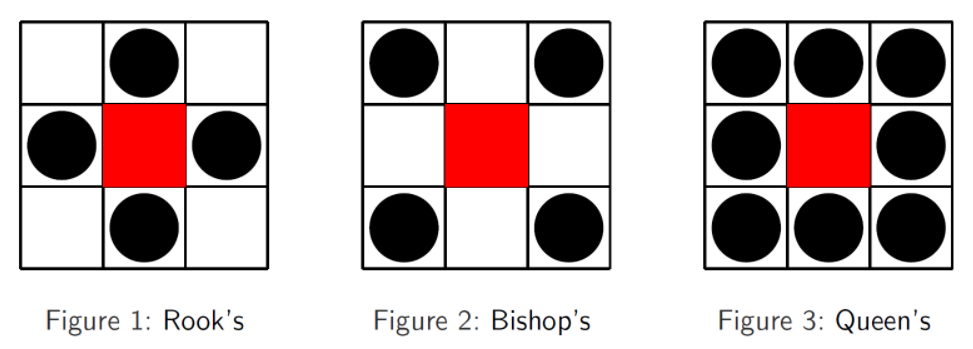
*source: https://rpubs.com/msgc/matrices_influence

### REFERENCE
* https://geographicdata.science/
* Sergio J. Rey
* Dani Arribas-Bel
* Levi J. Wolf

In [ ]:
import os
import numpy as np
import pandas as pd
os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd

pd.options.display.max_rows = 999999
pd.options.display.max_columns = 999999

In [ ]:
%store -r path

In [ ]:
gdf = gpd.read_file(os.path.join(path, "scag_region.gpkg"), encoding="utf-8")
print(gdf.shape)
print(gdf.crs)
gdf[:1]

In [ ]:
gdf = gdf.to_crs(26911)  #UTM zone 11N

In [ ]:
gdf.explore()

# Queen weights

In [ ]:
from libpysal.weights import Queen

In [ ]:
qW = Queen.from_dataframe(gdf)
qW

In [ ]:
qW_matrix, idx = qW.full()
qW_matrix

In [ ]:
qW[0]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))
gdf[gdf.index == 0].boundary.plot(color="black", ax=ax)
gdf[gdf.index.isin(qW[0])].plot(cmap=plt.cm.jet, ax=ax)
ax.set_axis_off()
plt.show()

# Rook weights

In [ ]:
from libpysal.weights import Rook

In [ ]:
rW = Rook.from_dataframe(gdf)
rW

In [ ]:
rW_matrix, idx = rW.full()
rW_matrix

In [ ]:
rW[0]

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
gdf[gdf.index == 0].boundary.plot(color="black", ax=ax)
gdf[gdf.index.isin(rW[0])].plot(cmap=plt.cm.jet, ax=ax)
ax.set_axis_off()
plt.show()

# Bishop Weights

In [ ]:
from libpysal.weights import w_difference

In [ ]:
bW = w_difference(qW, rW, constrained=False)
bW

In [ ]:
bW_matrix, idx = bW.full()
bW_matrix

In [ ]:
bW[0]

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
gdf[gdf.index == 0].boundary.plot(color="black", ax=ax)
gdf[gdf.index.isin(bW[0])].plot(cmap=plt.cm.jet, ax=ax)
ax.set_axis_off()
plt.show()

# *Other Weights* 
เพื่อแก้ปัญหา island

# Weights by distance

In [ ]:
from libpysal.weights import DistanceBand

In [ ]:
# สิ่งสำคัญ คือ ต้องมั่นใจว่า GeoDataFrame อยู่ในพิกัด crs ที่เป็น UTM

dW = DistanceBand.from_dataframe(gdf, threshold=2000) 
dW

In [ ]:
dW_matrix, idx = dW.full()
dW_matrix

In [ ]:
dW[0]

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
gdf[gdf.index == 0].boundary.plot(color="black", ax=ax)
gdf[gdf.index.isin(dW[0])].plot(cmap=plt.cm.jet, ax=ax)
ax.set_axis_off()
plt.show()

# KNN Weights

In [ ]:
from libpysal.weights import KNN

In [ ]:
w_knn = KNN.from_dataframe(gdf, k=5)
w_knn

In [ ]:
w_knn_matrix, idx = w_knn.full()
w_knn_matrix

In [ ]:
w_knn[0]

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
gdf[gdf.index == 0].boundary.plot(color="black", ax=ax)
gdf[gdf.index.isin(w_knn[0])].plot(cmap=plt.cm.jet, ax=ax)
ax.set_axis_off()
plt.show()